<h1 style="font-size:30px;"><center><ins>Earthquake Damage Prediction</ins></center></h1>

## Business Case

To create a predictive model to predict the level of damage grade affected by the earthquake.



<img src="https://cdn.zeebiz.com/sites/default/files/styles/zeebiz_850x478/public/2020/10/24/131828-earthquaake-ians.PNG?itok=jQbbOVGH">

## Domain Analysis

* Features
    - The dataset mainly consists of information on the buildings' structure and their legal ownership. Each row in the dataset represents a specific building in the region that was hit by Gorkha earthquake.
    - There are 39 columns in this dataset, where the building_id column is a unique and random identifier. The remaining 38 features are described in the section below. Categorical variables have been obfuscated random lowercase ascii characters. The appearance of the same character in distinct columns does not imply the same original value.
* Description
    - geo_level_1_id, geo_level_2_id, geo_level_3_id (type: int): geographic region in which building exists, from largest (level 1) to most specific sub-region (level 3). Possible values: level 1: 0-30, level 2: 0-1427, level 3: 0-12567.
    - count_floors_pre_eq (type: int): number of floors in the building before the earthquake.
    - age (type: int): age of the building in years.
    - area_percentage (type: int): normalized area of the building footprint.
    - height_percentage (type: int): normalized height of the building footprint.
    - land_surface_condition (type: categorical): surface condition of the land where the building was built. Possible values: n, o, t.
        - n: Indicates "normal" surface condition.
        - o: Indicates "other" surface condition.
        - t: Indicates "technical" surface condition.
    - foundation_type (type: categorical): type of foundation used while building. Possible values: h, i, r, u, w.
        - h: Indicates the use of "hard foundation."
        - i: Indicates the use of "other foundation."
        - r: Indicates the use of "reinforced foundation."
        - u: Indicates the use of "bamboo foundation."
        - w: Indicates the use of "wooden foundation."

    - roof_type (type: categorical): type of roof used while building. Possible values: n, q, x.
        - n: Indicates the use of a "normal" roof type.
        - q: Indicates the use of a "hip" roof type.
        - x: Indicates the use of an "unknown" roof type.
    - ground_floor_type (type: categorical): type of the ground floor. Possible values: f, m, v, x, z.
        - f: Indicates a ground floor made of "fine aggregate concrete."
        - m: Indicates a ground floor made of "mud."
        - v: Indicates a ground floor made of "not applicable" material.
        - x: Indicates a ground floor made of "timber."
        - z: Indicates a ground floor made of "zinc."
    - other_floor_type (type: categorical): type of constructions used in higher than the ground floors (except of roof). Possible values: j, q, s, x.
    - position (type: categorical): position of the building. Possible values: j, o, s, t.
        - j: Indicates the building is in a "j" (juvenile) position.
        - o: Indicates the building is in an "o" (other) position.
        - s: Indicates the building is in an "s" (secondary) position.
        - t: Indicates the building is in a "t" (tertiary) position.
    - plan_configuration (type: categorical): building plan configuration. Possible values: a, c, d, f, m, n, o, q, s, u.
    - has_superstructure_adobe_mud (type: binary): flag variable that indicates if the superstructure was made of Adobe/Mud.
    - has_superstructure_mud_mortar_stone (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Stone.
    - has_superstructure_stone_flag (type: binary): flag variable that indicates if the superstructure was made of Stone.
    - has_superstructure_cement_mortar_stone (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Stone.
    - has_superstructure_mud_mortar_brick (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Brick.
    - has_superstructure_cement_mortar_brick (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Brick.
    - has_superstructure_timber (type: binary): flag variable that indicates if the superstructure was made of Timber.
    - has_superstructure_bamboo (type: binary): flag variable that indicates if the superstructure was made of Bamboo.
    - has_superstructure_rc_non_engineered (type: binary): flag variable that indicates if the superstructure was made of non-engineered reinforced concrete.
    - has_superstructure_rc_engineered (type: binary): flag variable that indicates if the superstructure was made of engineered reinforced concrete.
    - has_superstructure_other (type: binary): flag variable that indicates if the superstructure was made of any other material.
    - legal_ownership_status (type: categorical): legal ownership status of the land where building was built. Possible values: a, r, v, w.
        - a: Indicates "other" legal ownership status.
        - r: Indicates "rented" legal ownership status.
        - v: Indicates "private" legal ownership status.
        - w: Indicates "public" legal ownership status. 
        
    - count_families (type: int): number of families that live in the building.
    - has_secondary_use (type: binary): flag variable that indicates if the building was used for any secondary purpose.
    - has_secondary_use_agriculture (type: binary): flag variable that indicates if the building was used for agricultural purposes.
    - has_secondary_use_hotel (type: binary): flag variable that indicates if the building was used as a hotel.
    - has_secondary_use_rental (type: binary): flag variable that indicates if the building was used for rental purposes.
    - has_secondary_use_institution (type: binary): flag variable that indicates if the building was used as a location of any institution.
    - has_secondary_use_school (type: binary): flag variable that indicates if the building was used as a school.
    - has_secondary_use_industry (type: binary): flag variable that indicates if the building was used for industrial purposes.
    - has_secondary_use_health_post (type: binary): flag variable that indicates if the building was used as a health post.
    - has_secondary_use_gov_office (type: binary): flag variable that indicates if the building was used fas a government office.
    - has_secondary_use_use_police (type: binary): flag variable that indicates if the building was used as a police station.
    - has_secondary_use_other (type: binary): flag variable that indicates if the building was secondarily used for other purposes.


**Importing Libraries**

In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from autoviz.AutoViz_Class import AutoViz_Class

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from category_encoders import CountEncoder

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score,GridSearchCV,RandomizedSearchCV

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Basic Checks

In [2]:
data1=pd.read_csv("train_labels.csv")
data1

building_id  damage_grade
0         802906           3     
1          28830           2     
2          94947           3     
3         590882           2     
4         201944           3     
...             ...           ...
260596    688636           2     
260597    669485           3     
260598    602512           3     
260599    151409           2     
260600    747594           3     

[260601 rows x 2 columns]

In [3]:
data2=pd.read_csv("train_values.csv")
data2

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0         802906            6              487            12198       
1          28830            8              900             2812       
2          94947           21              363             8973       
3         590882           22              418            10694       
4         201944           11              131             1488       
...             ...             ...             ...             ...   
260596    688636           25             1335             1621       
260597    669485           17              715             2060       
260598    602512           17               51             8163       
260599    151409           26               39             1851       
260600    747594           21                9             9101       

        count_floors_pre_eq  age  area_percentage  height_percentage  \
0                2           30          6                 5           
1                2           10          8                 7           
2                2           10          5                 5           
3                2           10          6                 5           
4                3           30          8                 9           
...                     ...  ...              ...                ...   
260596           1           55          6                 3           
260597           2            0          6                 5           
260598           3           55          6                 7           
260599           2           10         14                 6           
260600           3           10          7                 6           

       land_surface_condition foundation_type roof_type ground_floor_type  \
0                 t                   r            n             f          
1                 o                   r            n             x          
2                 t                   r            n             f          
3                 t                   r            n             f          
4                 t                   r            n             f          
...                       ...             ...       ...               ...   
260596            n                   r            n             f          
260597            t                   r            n             f          
260598            t                   r            q             f          
260599            t                   r            x             v          
260600            n                   r            n             f          

       other_floor_type position plan_configuration  \
0              q            t             d           
1              q            s             d           
2              x            t             d           
3              x            s             d           
4              x            s             d           
...                 ...      ...                ...   
260596         j            s             q           
260597         q            s             d           
260598         q            s             d           
260599         s            j             d           
260600         q            j             d           

        has_superstructure_adobe_mud  has_superstructure_mud_mortar_stone  \
0                     1                                1                    
1                     0                                1                    
2                     0                                1                    
3                     0                                1                    
4                     1                                0                    
...                              ...                                  ...   
260596                0                                1                    
260597                0                                1                    
260598     

In [4]:
data = pd.merge(data1,data2,on='building_id',how='inner')
data

building_id  damage_grade  geo_level_1_id  geo_level_2_id  \
0         802906           3              6              487        
1          28830           2              8              900        
2          94947           3             21              363        
3         590882           2             22              418        
4         201944           3             11              131        
...             ...           ...             ...             ...   
260596    688636           2             25             1335        
260597    669485           3             17              715        
260598    602512           3             17               51        
260599    151409           2             26               39        
260600    747594           3             21                9        

        geo_level_3_id  count_floors_pre_eq  age  area_percentage  \
0            12198               2           30          6          
1             2812               2           10          8          
2             8973               2           10          5          
3            10694               2           10          6          
4             1488               3           30          8          
...                ...                  ...  ...              ...   
260596        1621               1           55          6          
260597        2060               2            0          6          
260598        8163               3           55          6          
260599        1851               2           10         14          
260600        9101               3           10          7          

        height_percentage land_surface_condition foundation_type roof_type  \
0               5                    t                   r            n      
1               7                    o                   r            n      
2               5                    t                   r            n      
3               5                    t                   r            n      
4               9                    t                   r            n      
...                   ...                    ...             ...       ...   
260596          3                    n                   r            n      
260597          5                    t                   r            n      
260598          7                    t                   r            q      
260599          6                    t                   r            x      
260600          6                    n                   r            n      

       ground_floor_type other_floor_type position plan_configuration  \
0               f                q            t             d           
1               x                q            s             d           
2               f                x            t             d           
3               f                x            s             d           
4               f                x            s             d           
...                  ...              ...      ...                ...   
260596          f                j            s             q           
260597          f                q            s             d           
260598          f                q            s             d           
260599          v                s            j             d           
260600          f                q            j             d           

        has_superstructure_adobe_mud  has_superstructure_mud_mortar_stone  \
0                     1                                1                    
1                     0                                1                    
2                     0                                1                    
3                     0                                1                    
4                     1                                0                    
...                              ...                                  ... 

In [5]:
data.head()

building_id  damage_grade  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0    802906           3              6              487            12198       
1     28830           2              8              900             2812       
2     94947           3             21              363             8973       
3    590882           2             22              418            10694       
4    201944           3             11              131             1488       

   count_floors_pre_eq  age  area_percentage  height_percentage  \
0           2           30          6                 5           
1           2           10          8                 7           
2           2           10          5                 5           
3           2           10          6                 5           
4           3           30          8                 9           

  land_surface_condition foundation_type roof_type ground_floor_type  \
0            t                   r            n             f          
1            o                   r            n             x          
2            t                   r            n             f          
3            t                   r            n             f          
4            t                   r            n             f          

  other_floor_type position plan_configuration  has_superstructure_adobe_mud  \
0         q            t             d                        1                
1         q            s             d                        0                
2         x            t             d                        0                
3         x            s             d                        0                
4         x            s             d                        1                

   has_superstructure_mud_mortar_stone  has_superstructure_stone_flag  \
0                   1                                 0                 
1                   1                                 0                 
2                   1                                 0                 
3                   1                                 0                 
4                   0                                 0                 

   has_superstructure_cement_mortar_stone  \
0                     0                     
1                     0                     
2                     0                     
3                     0                     
4                     0                     

   has_superstructure_mud_mortar_brick  \
0                   0                    
1                   0                    
2                   0                    
3                   0                    
4                   0                    

   has_superstructure_cement_mortar_brick  has_superstructure_timber  \
0                     0                                0               
1                     0                                0               
2                     0                                0               
3                     0                                1               
4                     0                                0               

   has_superstructure_bamboo  has_superstructure_rc_non_engineered  \
0              0                                0                    
1              0                                0                    
2              0                                0                    
3              1                                0                    
4              0                                0                    

   has_superstructure_rc_engineered  has_superstructure_other  \
0                  0                             0              
1                  0                             0              
2                  0                             0              
3                  0                             0              
4                  0                             0             

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   damage_grade                            260601 non-null  int64 
 2   geo_level_1_id                          260601 non-null  int64 
 3   geo_level_2_id                          260601 non-null  int64 
 4   geo_level_3_id                          260601 non-null  int64 
 5   count_floors_pre_eq                     260601 non-null  int64 
 6   age                                     260601 non-null  int64 
 7   area_percentage                         260601 non-null  int64 
 8   height_percentage                       260601 non-null  int64 
 9   land_surface_condition                  260601 non-null  object
 10  foundation_type                         260601 non-null 

In [7]:
data.describe().T.style.bar(subset=['mean'],color='#93d206').background_gradient(subset=['std'],cmap="Accent")\
.background_gradient(subset=['50%'],cmap="tab10")

In [8]:
data.describe(include="O").T

count  unique top   freq 
land_surface_condition  260601    3     t  216757
foundation_type         260601    5     r  219196
roof_type               260601    3     n  182842
ground_floor_type       260601    5     f  209619
other_floor_type        260601    4     q  165282
position                260601    4     s  202090
plan_configuration      260601   10     d  250072
legal_ownership_status  260601    4     v  250939

## Exploratory Data Analysis

### Univarient Analysis

In [9]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri

In [10]:
numerical_col = data.select_dtypes(exclude='O').columns
categorical_col = data.select_dtypes(include='O').columns

In [11]:
len(numerical_col)

32

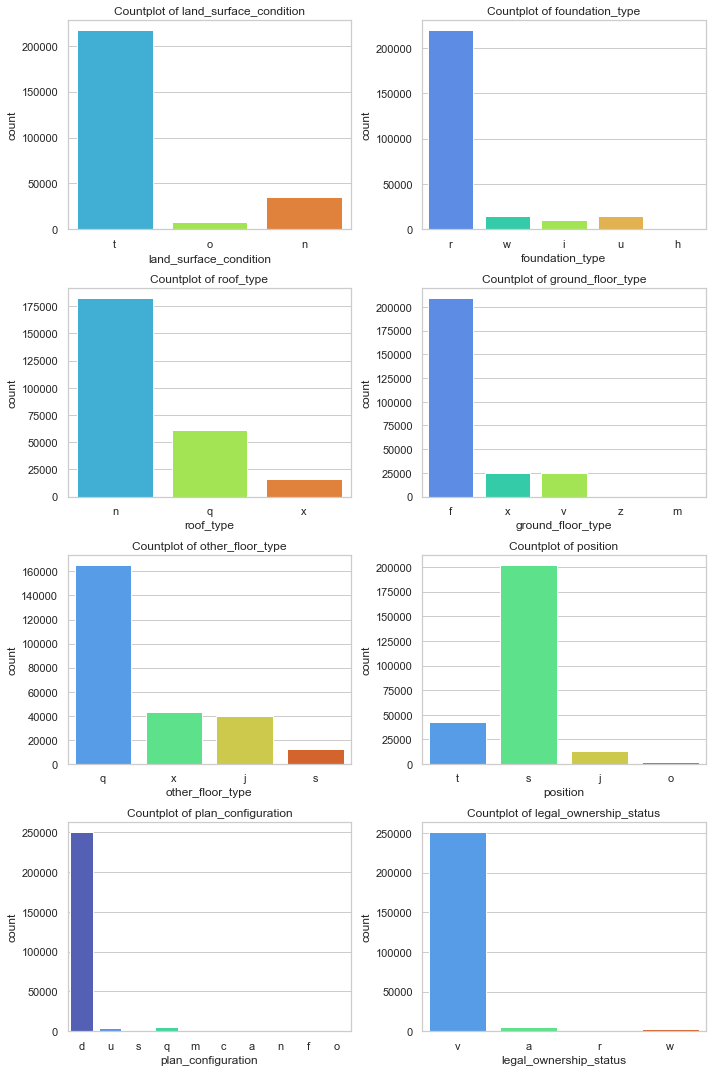

In [12]:
plt.figure(figsize=(10,15))
pltnum=1
for col in categorical_col:
    if pltnum<=8:
        ax=plt.subplot(4,2,pltnum)
        sns.countplot(x=data[col],palette="turbo")
        plt.title(f'Countplot of {col}')
        pltnum +=1

plt.tight_layout()
plt.show()

<ins>**Insights**</ins>

* `land_surface_condition`:-more land surface is of t(technical) type.
* `foundation_type`:-more buildings are of r(reinforced) type.
* `roof_type`:-more roofs are of n(normal) type.
* `ground_floor_type`:-more are of f(fine aggregate) type roofs.
* `other_floor_type`:- q type floors are more.
* `position`:-more buildings are in s(secondary) position.
* `plan_configuration`:-d type are more in plan_configuration.
* `legal_ownership_status`:-more are of private owned.



In [13]:
numerical_col

Index(['building_id', 'damage_grade', 'geo_level_1_id', 'geo_level_2_id',
       'geo_level_3_id', 'count_floors_pre_eq', 'age', 'area_percentage',
       'height_percentage', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other'],
      dt

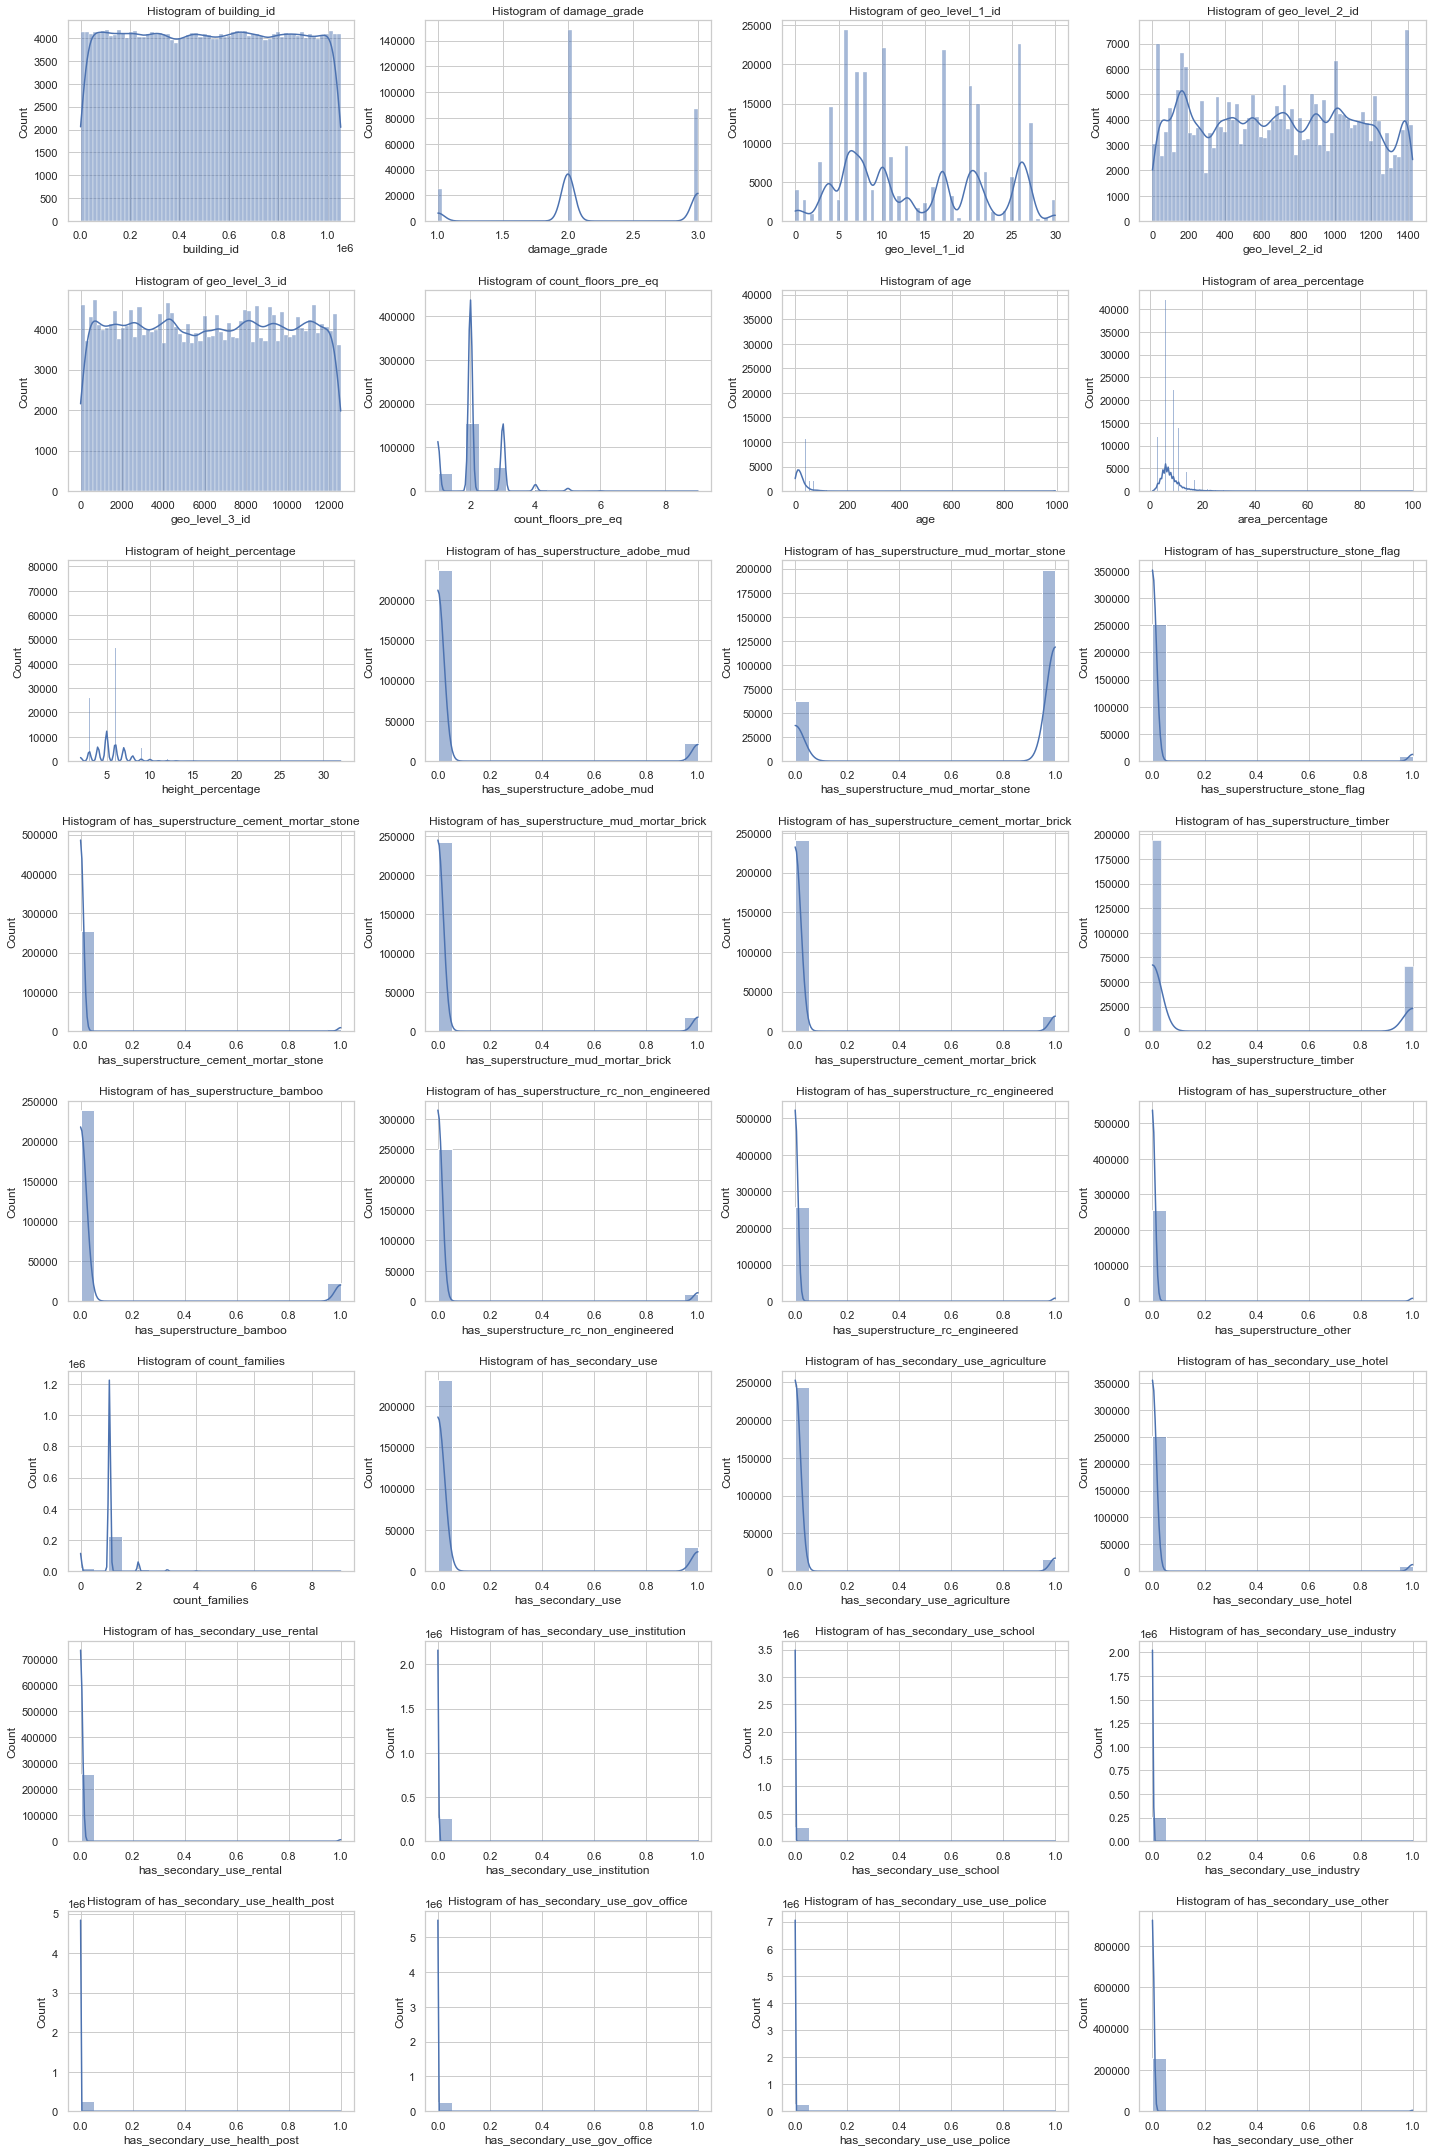

In [14]:
plt.figure(figsize=(20,30))

pltnum=1
for col in numerical_col:
    if pltnum<=32:
        ax=plt.subplot(8,4,pltnum)
        sns.histplot(x=data[col],kde=True)
        plt.title(f'Histogram of {col}')
        pltnum +=1
plt.tight_layout()

plt.show()

**Insights**

* 'has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other' - has discrete values `0 or 1` as its values, where all the features except has_superstructure_mud_mortar_brick has 0 as highest count.
* target column has 3 damage levels,the values are `imbalanced`
* 'building_id','geo_level_1_id', 'geo_level_2_id','geo_level_3_id' doesn't follow a particular pattern ,they are constant features and could be ignored
* age and area_percentage are postively skewed
* most of the buildings are newly build
* 2 storeyed buildings are more
* The independent homes are more compared to apartments


### Bivariant analysis

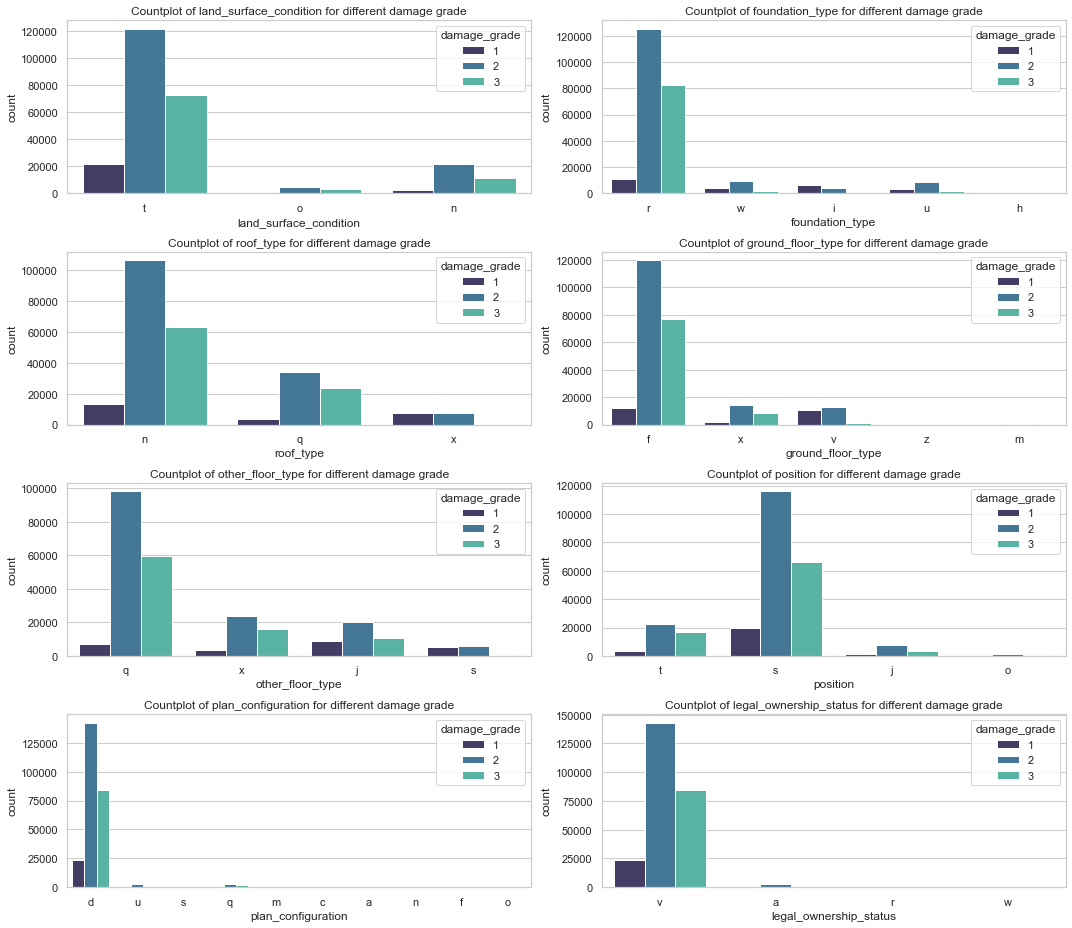

In [15]:
plt.figure(figsize=(15,13))
pltnum=1
for col in categorical_col:
    if pltnum<=8:
        ax=plt.subplot(4,2,pltnum)
        sns.countplot(x=data[col],hue=data['damage_grade'],palette="mako")
        plt.title(f'Countplot of {col} for different damage grade')
        pltnum +=1
plt.tight_layout()
plt.show()

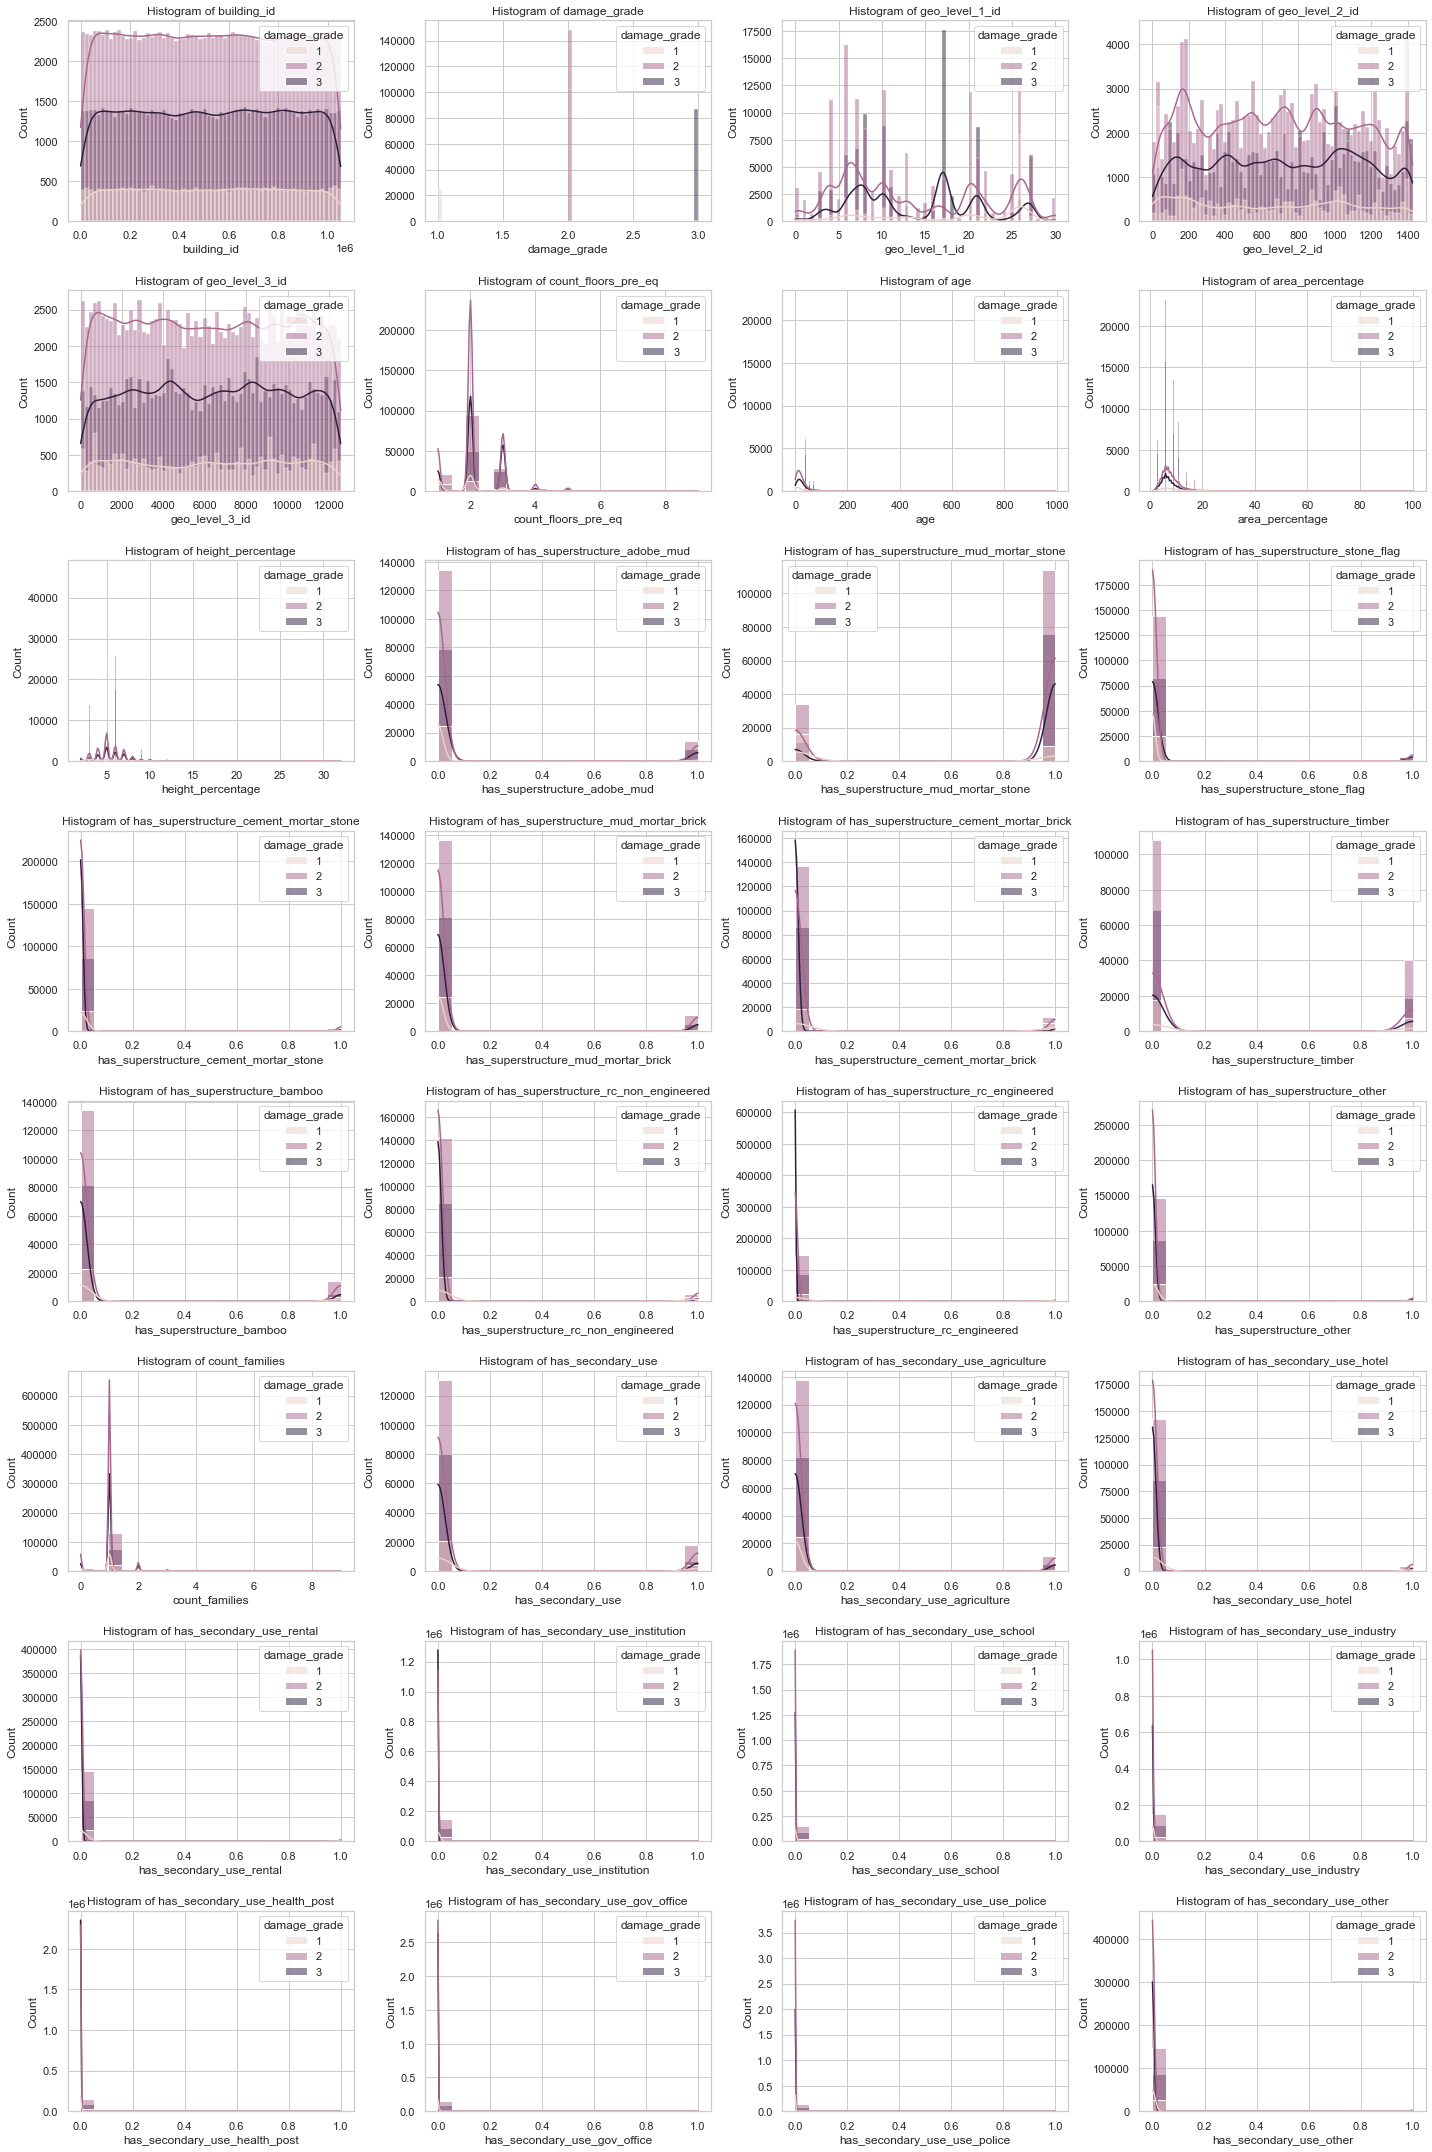

In [16]:
plt.figure(figsize=(20,30))
pltnum=1
for col in numerical_col:
    if pltnum<=32:
        ax=plt.subplot(8,4,pltnum)
        sns.histplot(x=data[col],hue=data['damage_grade'],kde=True)
        plt.title(f'Histogram of {col}')
        pltnum +=1
plt.tight_layout()
plt.show()

    max_rows_analyzed is smaller than dataset shape 260601...
        randomly sampled 150000 rows from read CSV file
Shape of your Data Set loaded: (150000, 40)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  8
    Number of String-Categorical Columns =  8
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  22
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    39 Predictors classified...
        1 variable(s) removed since they were ID or low-info

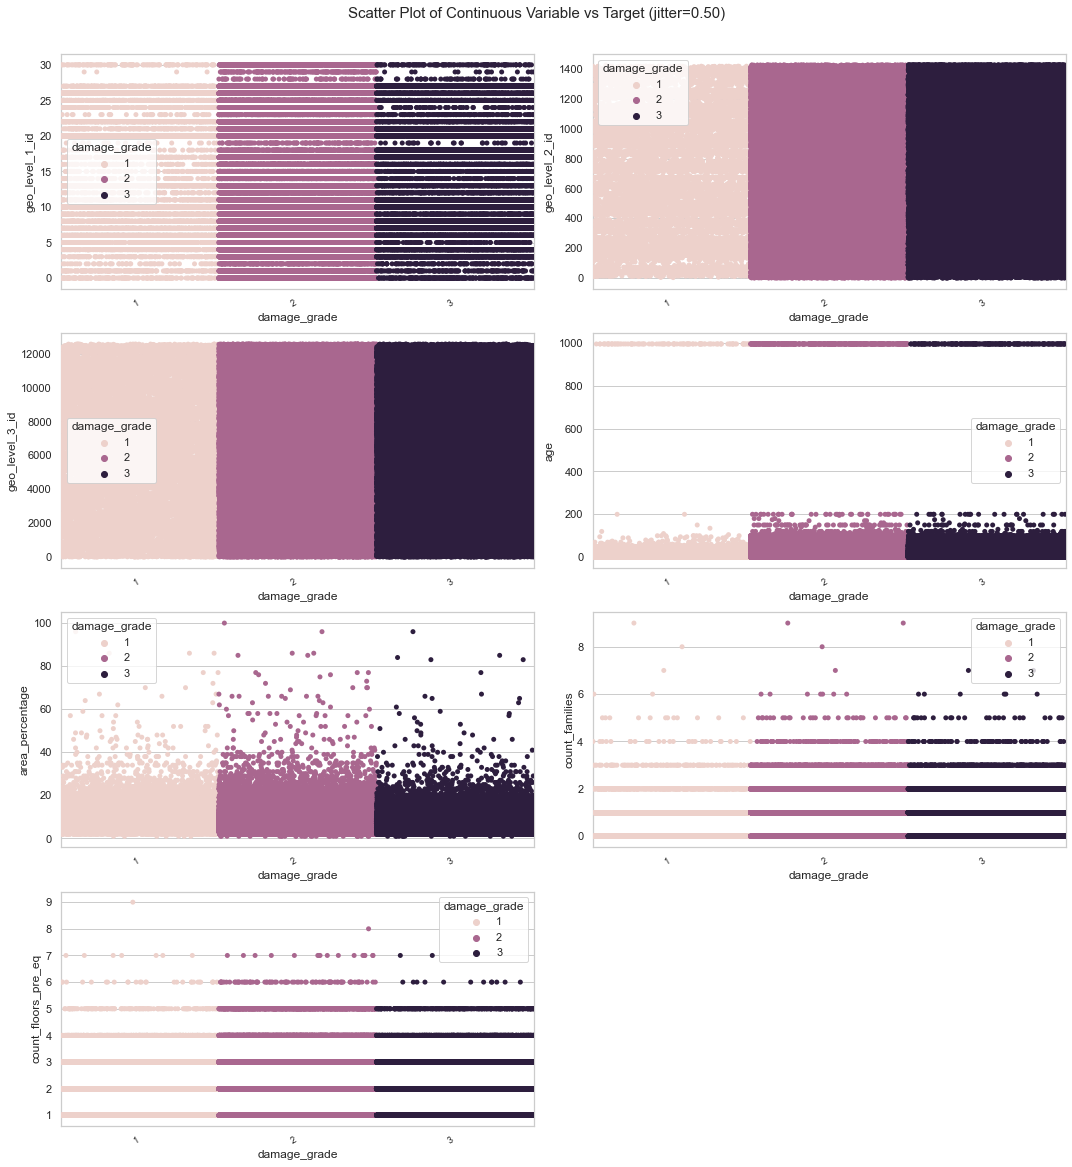

Total Number of Scatter Plots = 28


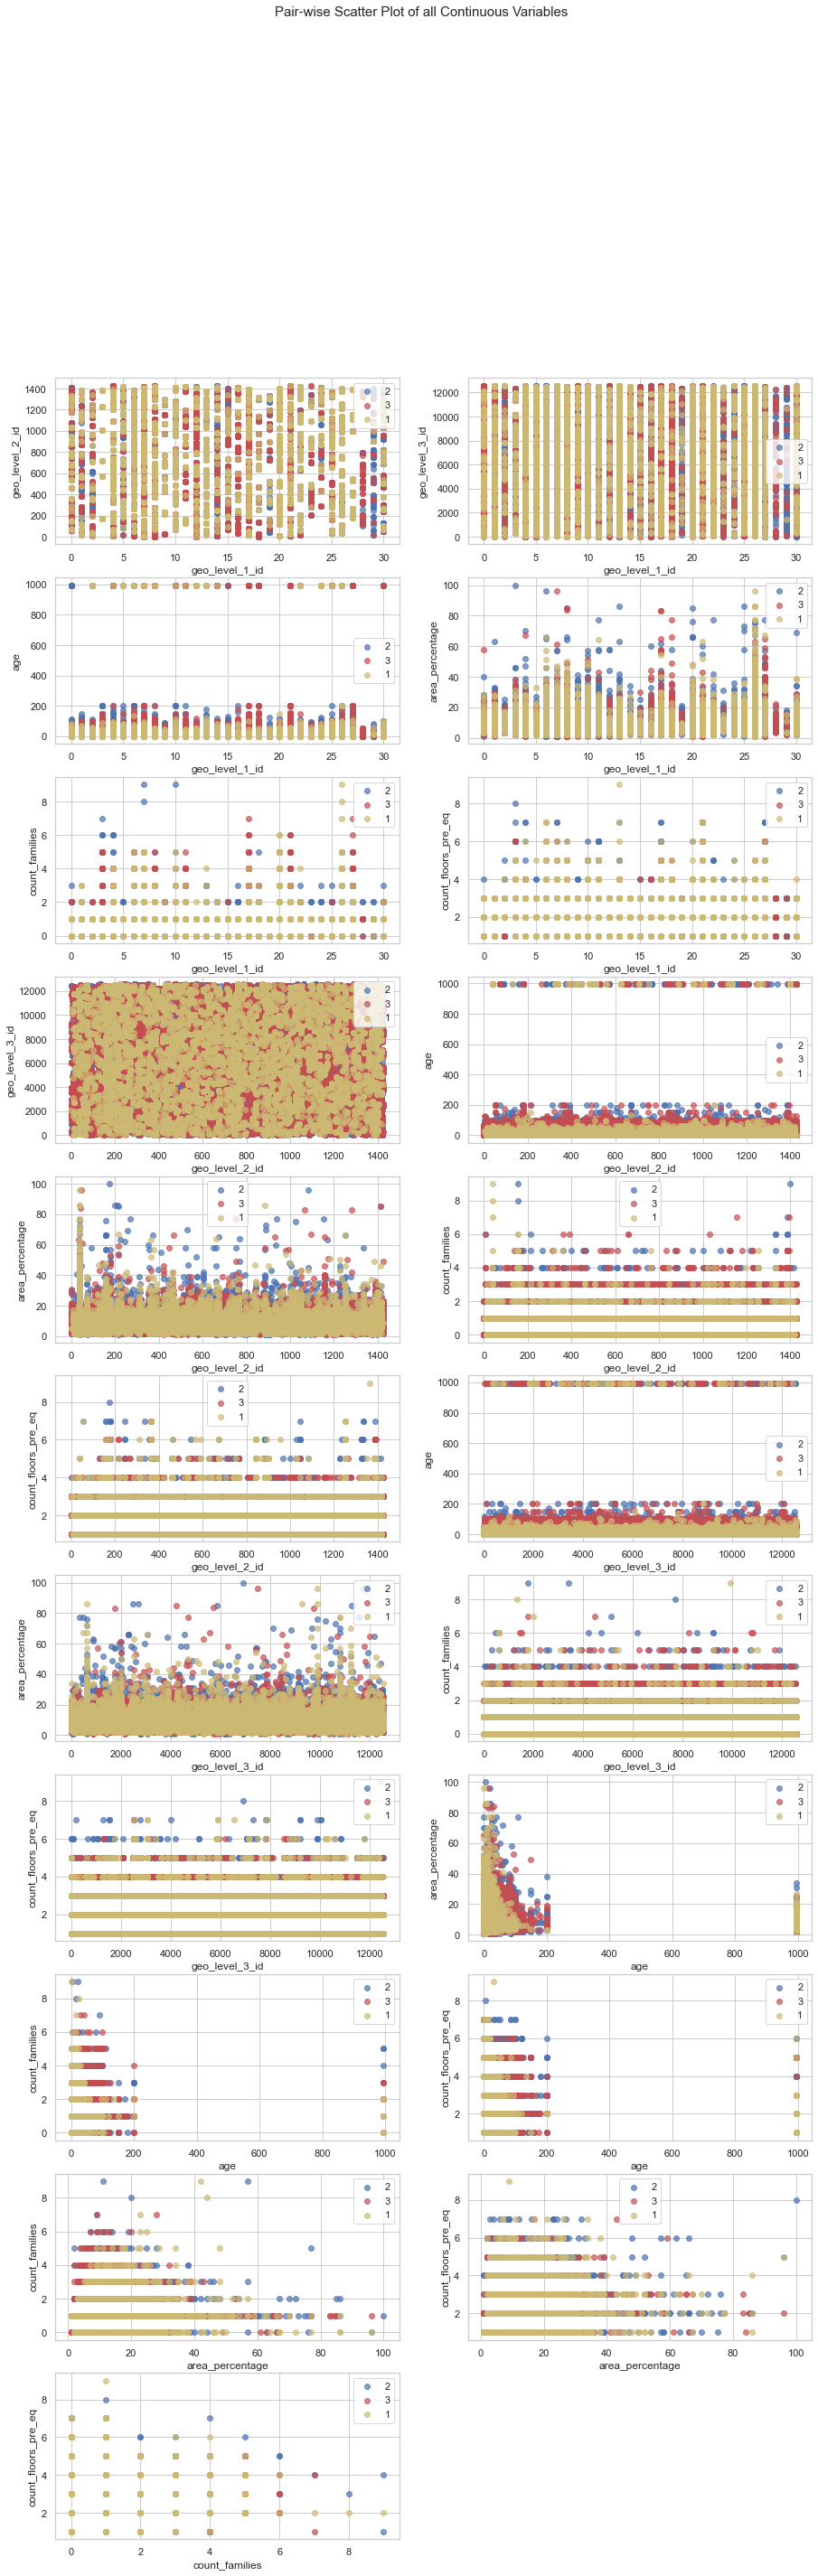

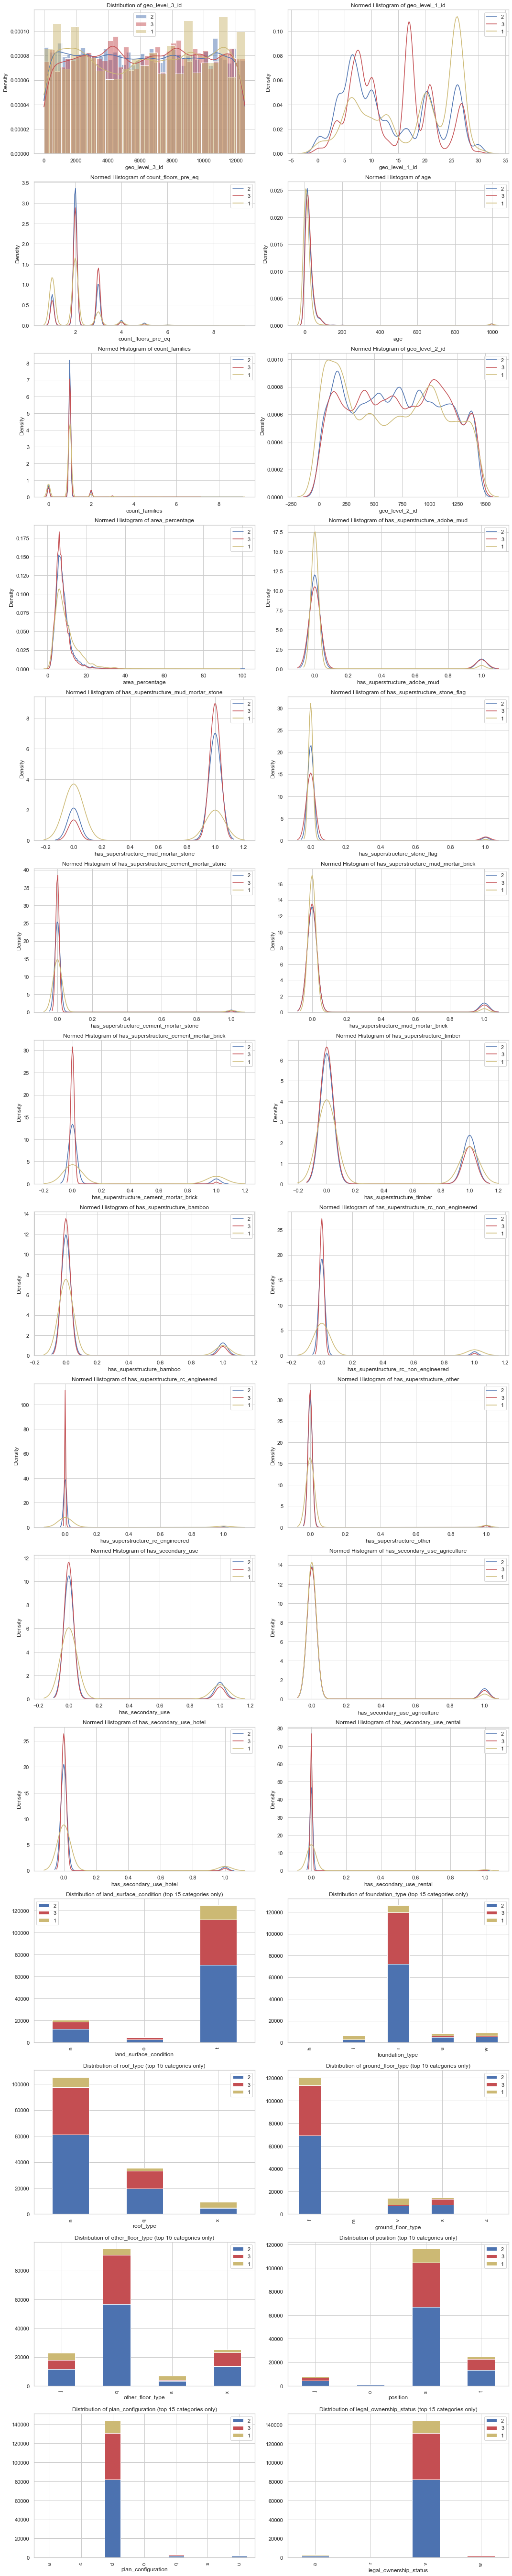

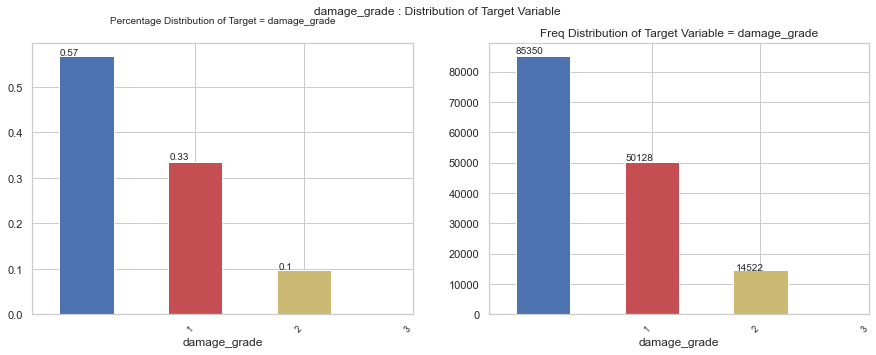

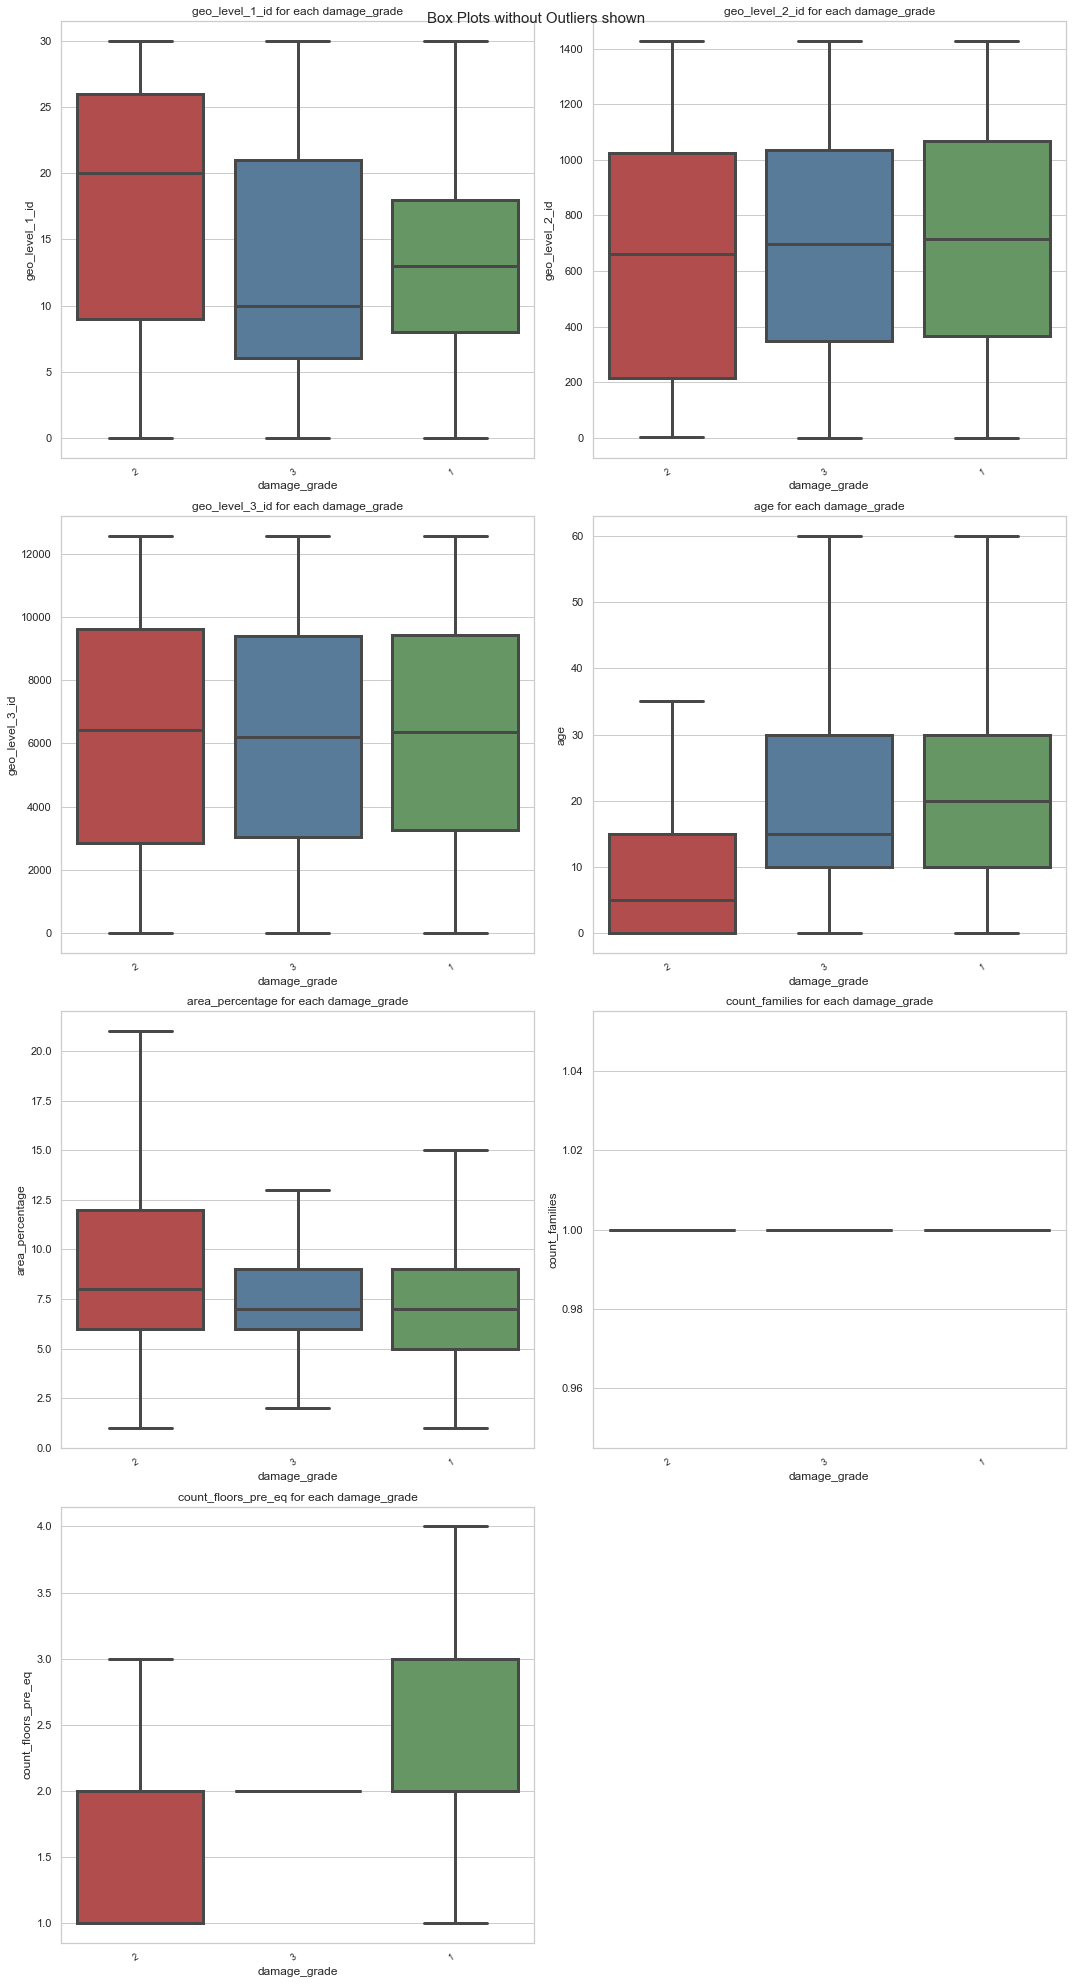

Could not draw some Heat Maps


<Figure size 1440x1440 with 0 Axes>

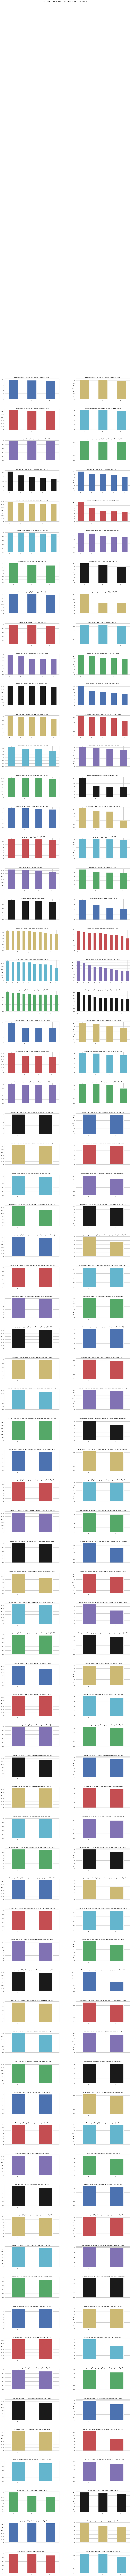

All Plots done
Time to run AutoViz = 261 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [17]:
# bivariate analysis
AV = AutoViz_Class()

dfte = AV.AutoViz('data.csv',sep=',', depVar='damage_grade', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='png',max_rows_analyzed=150000,max_cols_analyzed=30, 
               save_plot_dir='D:\\Datamites_Training\\Capstone Projects\\EarthquakeDamagePrediction\\Data')
plt.show()

## Data Preprocessing

In [9]:
X = data.drop(columns=['damage_grade'])

In [10]:
num_col = X.select_dtypes(exclude="O").columns
cat_col = X.select_dtypes(include="O").columns

### Pipeline

In [12]:
num_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scale', MinMaxScaler())
])

cat_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('count_encode',CountEncoder()),
    ('scale', MinMaxScaler())

])

preprocessor = ColumnTransformer(
    transformers=[
        ('num_pipeline',num_pipeline,num_col),
        ('cat_pipeline',cat_pipeline,cat_col)
    ]
)

In [13]:
X = preprocessor.fit_transform(X)

In [14]:
X.shape

(260601, 39)

In [15]:
df = pd.DataFrame(X,columns=['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other','land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status'])

In [16]:
df

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0        0.762541       0.200000        0.341275        0.970637      
1        0.027377       0.266667        0.630694        0.223761      
2        0.090170       0.700000        0.254380        0.714013      
3        0.561175       0.733333        0.292922        0.850959      
4        0.191789       0.366667        0.091801        0.118405      
...             ...             ...             ...             ...   
260596   0.654015       0.833333        0.935529        0.128989      
260597   0.635827       0.566667        0.501051        0.163921      
260598   0.572220       0.566667        0.035739        0.649558      
260599   0.143794       0.866667        0.027330        0.147291      
260600   0.710009       0.700000        0.006307        0.724198      

        count_floors_pre_eq     age    area_percentage  height_percentage  \
0              0.125         0.030151     0.050505          0.100000        
1              0.125         0.010050     0.070707          0.166667        
2              0.125         0.010050     0.040404          0.100000        
3              0.125         0.010050     0.050505          0.100000        
4              0.250         0.030151     0.070707          0.233333        
...                     ...       ...              ...                ...   
260596         0.000         0.055276     0.050505          0.033333        
260597         0.125         0.000000     0.050505          0.100000        
260598         0.250         0.055276     0.050505          0.166667        
260599         0.125         0.010050     0.131313          0.133333        
260600         0.250         0.010050     0.060606          0.133333        

        has_superstructure_adobe_mud  has_superstructure_mud_mortar_stone  \
0                    1.0                              1.0                   
1                    0.0                              1.0                   
2                    0.0                              1.0                   
3                    0.0                              1.0                   
4                    1.0                              0.0                   
...                              ...                                  ...   
260596               0.0                              1.0                   
260597               0.0                              1.0                   
260598               0.0                              1.0                   
260599               0.0                              0.0                   
260600               0.0                              1.0                   

        has_superstructure_stone_flag  has_superstructure_cement_mortar_stone  \
0                    0.0                                 0.0                    
1                    0.0                                 0.0                    
2                    0.0                                 0.0                    
3                    0.0                                 0.0                    
4                    0.0                                 0.0                    
...                               ...                                     ...   
260596               0.0                                 0.0                    
260597               0.0                                 0.0                    
260598               0.0                                 0.0                    
260599               0.0                                 0.0                    
260600               0.0                                 0.0                    

        has_superstructure_mud_mortar_brick  \
0                       0.0                   
1                       0.0                   
2                       0.0                   
3                       0.0                   
4                       0.0                   
...                                     ...   
260

**Checking feature importance**

In [77]:
model = CatBoostClassifier()

model.fit(df, data['damage_grade'])

feature_importance_catboost = model.get_feature_importance()

# Create a DataFrame with feature names and their importance scores
feature_importance_df_catboost = pd.DataFrame({'Feature': df.columns, 'Importance': feature_importance_catboost})

# Sort the DataFrame by importance in descending order
feature_importance_df_catboost = feature_importance_df_catboost.sort_values(by='Importance', ascending=False)

# Print or return the top features
print("Top Features - CatBoost:")
feature_importance_df_catboost = feature_importance_df_catboost.head(16)
feature_importance_df_catboost

Learning rate set to 0.105084
0:	learn: 1.0426749	total: 315ms	remaining: 5m 14s
1:	learn: 0.9975364	total: 446ms	remaining: 3m 42s
2:	learn: 0.9605911	total: 579ms	remaining: 3m 12s
3:	learn: 0.9297411	total: 720ms	remaining: 2m 59s
4:	learn: 0.9043619	total: 832ms	remaining: 2m 45s
5:	learn: 0.8819064	total: 956ms	remaining: 2m 38s
6:	learn: 0.8632312	total: 1.06s	remaining: 2m 29s
7:	learn: 0.8481845	total: 1.16s	remaining: 2m 24s
8:	learn: 0.8345457	total: 1.29s	remaining: 2m 22s
9:	learn: 0.8222961	total: 1.43s	remaining: 2m 21s
10:	learn: 0.8111332	total: 1.58s	remaining: 2m 21s
11:	learn: 0.8018982	total: 1.67s	remaining: 2m 17s
12:	learn: 0.7935622	total: 1.76s	remaining: 2m 13s
13:	learn: 0.7866916	total: 1.85s	remaining: 2m 10s
14:	learn: 0.7802538	total: 1.99s	remaining: 2m 10s
15:	learn: 0.7755001	total: 2.12s	remaining: 2m 10s
16:	learn: 0.7702933	total: 2.23s	remaining: 2m 8s
17:	learn: 0.7649444	total: 2.38s	remaining: 2m 9s
18:	learn: 0.7607804	total: 2.53s	remaining: 2

Feature                  Importance
1                           geo_level_1_id   43.339947
2                           geo_level_2_id   15.464393
3                           geo_level_3_id    4.885660
32                         foundation_type    3.999813
5                                      age    3.862410
9      has_superstructure_mud_mortar_stone    3.591616
35                        other_floor_type    2.562591
34                       ground_floor_type    2.524384
4                      count_floors_pre_eq    2.135636
7                        height_percentage    2.045902
6                          area_percentage    1.986807
33                               roof_type    1.891953
14               has_superstructure_timber    1.851640
13  has_superstructure_cement_mortar_brick    1.138036
8             has_superstructure_adobe_mud    1.034329
10           has_superstructure_stone_flag    1.024317

## Model Creation

In [78]:
selected_feature_names = feature_importance_df_catboost['Feature'].to_list()

In [79]:
X = df[selected_feature_names]
y = data['damage_grade']

As the data is imbalanced, the training data is balanced using SMOTE

In [80]:
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({2: 148259, 3: 87218, 1: 25124})


In [81]:
sm = SMOTE(sampling_strategy='all',random_state=42)

X_train_resampled, y_train_resampled = sm.fit_resample(X,y)

print('Original dataset shape %s' % Counter(y_train_resampled))

Original dataset shape Counter({3: 148259, 2: 148259, 1: 148259})


In [82]:
X_train,X_test,y_train,y_test = train_test_split(X_train_resampled,y_train_resampled,test_size=0.3,random_state=42)
X_train.shape,X_test.shape

((311343, 16), (133434, 16))

In [83]:
def evaluate_model(true, predicted):
    accuracy = accuracy_score(true,predicted)
    f1 = f1_score(true,predicted,average='weighted')
    precision = precision_score(true,predicted,average='weighted')
    recall = recall_score(true,predicted,average='weighted')
    
    return accuracy,f1,precision, recall

In [84]:
params={
        "Decision Tree": {
            'criterion':["gini", "entropy", "log_loss"],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        },
        "Random Forest":{
            'criterion':["gini", "entropy", "log_loss"],
            'n_estimators': [50, 100, 200], 
            'max_depth': [None, 10, 20, 30], 
            'min_samples_split': [2, 5, 10]
        },
        "Logistic Regression":{
            'C': [0.001, 0.01, 0.1, 1, 10, 100], 
            'penalty': ['l1', 'l2']
        },
        "KNN":{
            'n_neighbors': [3, 5, 7, 9], 
            'weights': ['uniform', 'distance'],
            'algorithm':['ball_tree','kd_tree','brute']
        },
        "GradientBoost":{
            'n_estimators': [50, 100, 200], 
            'learning_rate': [0.01, 0.1, 1], 
            'max_depth': [3, 5, 7]
        },
        "XGBClassifier":{
            'learning_rate':[.1,.01,.05,.001],
            'n_estimators': [8,16,32,64,128,256]
        },
        "CatBoostClassifier":{
            'iterations': [50, 100, 200], 
            'learning_rate': [0.01, 0.1, 1], 
            'depth': [4, 6, 8]
        },
        "AdaBoost":{
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1]
        },
        "LightGBMClassifier":{
            'n_estimators': [50, 100, 200], 
            'learning_rate': [0.01, 0.1, 1], 
            'max_depth': [3, 5, 7]
           },
        "MLPClassifier" : {
            'hidden_layer_sizes': [(50,), (100,), (50, 50)],
            'alpha': [0.0001, 0.001, 0.01]
        }

}


In [98]:
model_results= {}
class_mapping = {label: idx for idx, label in enumerate(np.unique(y_train))}
y_train_mapped = np.vectorize(class_mapping.get)(y_train)

class_mapping = {label: idx for idx, label in enumerate(np.unique(y_test))}
y_test_mapped = np.vectorize(class_mapping.get)(y_test)

def run_model(model_name, model):
    '''
    Function to run the model and return the results
    '''
    model.fit(X_train, y_train_mapped)  # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Map class labels for test set if needed
    y_test_mapped = np.vectorize(class_mapping.get)(y_test)
    
    # Evaluate Train and Test dataset
    model_train_accuracy, model_train_f1, model_train_precision, model_train_recall = evaluate_model(
        y_train_mapped, y_train_pred)
    model_test_accuracy, model_test_f1, model_test_precision, model_test_recall = evaluate_model(
        y_test_mapped, y_test_pred)

    cross_val_mean = cross_val_score(model, X_train, y_train_mapped, cv=5,scoring='f1_weighted').mean()
    cross_val_std = cross_val_score(model, X_train, y_train_mapped, cv=5,scoring='f1_weighted').std()

    print(model_name)

    print('Model performance for Training set')
    print("- Accuracy : {:.4f}".format(model_train_accuracy))
    print("- F1_score : {:.4f}".format(model_train_f1))
    print("- Precision Score: {:.4f}".format(model_train_precision))
    print("- Recall Score: {:.4f}".format(model_train_recall))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- F1_score: {:.4f}".format(model_test_f1))
    print("- Precision Score: {:.4f}".format(model_test_precision))
    print("- Recall Score: {:.4f}".format(model_test_recall))

    print('----------------------------------')

    print("Crossvalidate Score(mean): {:.4f}".format(cross_val_mean))
    print("Crossvalidate Std: {:.4f}".format(cross_val_std))

    model_results[model_name] = {
          'accuracy_train':model_train_accuracy,
          'accuracy_test':model_test_accuracy,
          'f1_train':model_train_f1,
          'f1_test':model_test_f1 
        }

    print('=' * 35)

#     print('\n')

In [86]:
def hyper_tuning(model_name,model):
        '''
        Function to do hyperparameter tuning
        '''
        para = params[model_name]

        gs = RandomizedSearchCV(model,para,cv=5,scoring='f1_weighted',n_jobs=-1)
        gs.fit(X_train,y_train)
        
        model.set_params(**gs.best_params_)
        run_model(model_name,model)
        

In [149]:
hyper_tuning('Decision Tree',DecisionTreeClassifier())

Decision Tree
Model performance for Training set
- Accuracy : 0.9096
- F1_score : 0.9095
- Precision Score: 0.9099
- Recall Score: 0.9096
----------------------------------
Model performance for Test set
- Accuracy: 0.7626
- F1_score: 0.7620
- Precision Score: 0.7619
- Recall Score: 0.7626
----------------------------------
Crossvalidate Score(mean): 0.7536
Crossvalidate Std: 0.0007


In [148]:
hyper_tuning('Logistic Regression',LogisticRegression())

Logistic Regression
Model performance for Training set
- Accuracy : 0.5653
- F1_score : 0.5559
- Precision Score: 0.5681
- Recall Score: 0.5653
----------------------------------
Model performance for Test set
- Accuracy: 0.5634
- F1_score: 0.5539
- Precision Score: 0.5665
- Recall Score: 0.5634
----------------------------------
Crossvalidate Score(mean): 0.5559
Crossvalidate Std: 0.0014


In [30]:
run_model('KNN',KNeighborsClassifier())

KNN
Model performance for Training set
- Accuracy : 0.8165
- F1_score : 0.8099
- Precision Score: 0.8173
- Recall Score: 0.8165
----------------------------------
Model performance for Test set
- Accuracy: 0.7333
- F1_score: 0.7207
- Precision Score: 0.7265
- Recall Score: 0.7333
----------------------------------
Crossvalidate Score(mean): 0.7047
Crossvalidate Std: 0.0023


In [90]:
run_model('XGBClassifier',XGBClassifier())

XGBClassifier
Model performance for Training set
- Accuracy : 0.8158
- F1_score : 0.8163
- Precision Score: 0.8208
- Recall Score: 0.8158
----------------------------------
Model performance for Test set
- Accuracy: 0.8053
- F1_score: 0.8058
- Precision Score: 0.8101
- Recall Score: 0.8053
----------------------------------
Crossvalidate Score(mean): 0.8034
Crossvalidate Std: 0.0012


In [ ]:
hyper_tuning('XGBClassifier',XGBClassifier())

In [150]:
run_model('Random Forest',RandomForestClassifier())

Random Forest
Model performance for Training set
- Accuracy : 0.9851
- F1_score : 0.9851
- Precision Score: 0.9851
- Recall Score: 0.9851
----------------------------------
Model performance for Test set
- Accuracy: 0.8205
- F1_score: 0.8202
- Precision Score: 0.8204
- Recall Score: 0.8205
----------------------------------
Crossvalidate Score(mean): 0.8138
Crossvalidate Std: 0.0005


In [151]:
run_model('CatBoostClassifier',CatBoostClassifier())

Learning rate set to 0.106042
0:	learn: 1.0484991	total: 138ms	remaining: 2m 18s
1:	learn: 1.0100142	total: 285ms	remaining: 2m 22s
2:	learn: 0.9792965	total: 450ms	remaining: 2m 29s
3:	learn: 0.9513540	total: 646ms	remaining: 2m 40s
4:	learn: 0.9289994	total: 821ms	remaining: 2m 43s
5:	learn: 0.9098221	total: 1s	remaining: 2m 46s
6:	learn: 0.8929124	total: 1.12s	remaining: 2m 39s
7:	learn: 0.8771896	total: 1.23s	remaining: 2m 32s
8:	learn: 0.8632614	total: 1.32s	remaining: 2m 26s
9:	learn: 0.8488977	total: 1.42s	remaining: 2m 20s
10:	learn: 0.8382686	total: 1.51s	remaining: 2m 16s
11:	learn: 0.8271863	total: 1.6s	remaining: 2m 11s
12:	learn: 0.8184242	total: 1.69s	remaining: 2m 8s
13:	learn: 0.8082797	total: 1.78s	remaining: 2m 5s
14:	learn: 0.7998942	total: 1.88s	remaining: 2m 3s
15:	learn: 0.7916134	total: 1.97s	remaining: 2m 1s
16:	learn: 0.7854996	total: 2.06s	remaining: 1m 58s
17:	learn: 0.7768362	total: 2.14s	remaining: 1m 56s
18:	learn: 0.7702598	total: 2.27s	remaining: 1m 57s


In [71]:
run_model('GradientBoost',GradientBoostingClassifier())

GradientBoost
Model performance for Training set
- Accuracy : 0.6825
- F1_score : 0.6658
- Precision Score: 0.6861
- Recall Score: 0.6825
----------------------------------
Model performance for Test set
- Accuracy: 0.6818
- F1_score: 0.6651
- Precision Score: 0.6858
- Recall Score: 0.6818
----------------------------------
Crossvalidate Score(mean): 0.6627
Crossvalidate Std: 0.0013


In [ ]:
hyper_tuning('GradientBoost',GradientBoostingClassifier())

In [146]:
hyper_tuning('AdaBoost',AdaBoostClassifier())

AdaBoost
Model performance for Training set
- Accuracy : 0.7224
- F1_score : 0.7229
- Precision Score: 0.7235
- Recall Score: 0.7224
----------------------------------
Model performance for Test set
- Accuracy: 0.7222
- F1_score: 0.7227
- Precision Score: 0.7233
- Recall Score: 0.7222
----------------------------------
Crossvalidate Score(mean): 0.7220
Crossvalidate Std: 0.0031


In [132]:
hyper_tuning('LightGBMClassifier',LGBMClassifier())

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016732 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2871
[LightGBM] [Info] Number of data points in the train set: 311343, number of used features: 16
[LightGBM] [Info] Start training from score -1.097206
[LightGBM] [Info] Start training from score -1.100117
[LightGBM] [Info] Start training from score -1.098516
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [74]:
run_model('MLPClassifier',MLPClassifier())

In [120]:
lstm_model = Sequential()
lstm_model.add(LSTM(50,input_shape=(X_train.shape[1],1),activation='relu',return_sequences=True))
lstm_model.add(LSTM(30,activation='relu',return_sequences=True))
lstm_model.add(LSTM(10,activation='relu'))
lstm_model.add(Dense(3,activation='softmax'))
lstm_model.summary()
# 50-30-10
# lstm 100,50,30 dense 10

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ lstm_51 (LSTM)                  │ (None, 16, 50)            │     10,400 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ lstm_52 (LSTM)                  │ (None, 16, 30)            │      9,720 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ lstm_53 (LSTM)                  │ (None, 10)                │      1,640 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_12 (Dense)                │ (None, 3)                 │         33 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 21,793 (85.13 KB)

 Trainable params: 21,793 (85.13 KB)

 Non-trainable params: 0 (0.00 B)

In [121]:
def f1_metric(y_true, y_pred):
    y_pred = tf.argmax(y_pred, axis=1)
    f1 = f1_score(y_true, y_pred, average='weighted')
    return f1

In [122]:
lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])  

In [124]:
history = lstm_model.fit(X_train, y_train_mapped, validation_split=0.3,batch_size=500,epochs=15)

Epoch 1/15


436/436 ━━━━━━━━━━━━━━━━━━━━ 39s 90ms/step - accuracy: 0.5165 - loss: 0.9513 - val_accuracy: 0.5423 - val_loss: 0.9012
Epoch 2/15
436/436 ━━━━━━━━━━━━━━━━━━━━ 40s 92ms/step - accuracy: 0.5399 - loss: 0.9028 - val_accuracy: 0.5430 - val_loss: 0.8960
Epoch 3/15
436/436 ━━━━━━━━━━━━━━━━━━━━ 39s 90ms/step - accuracy: 0.5527 - loss: 0.8887 - val_accuracy: 0.5554 - val_loss: 0.8849
Epoch 4/15
436/436 ━━━━━━━━━━━━━━━━━━━━ 35s 80ms/step - accuracy: 0.5659 - loss: 0.8725 - val_accuracy: 0.5719 - val_loss: 0.8711
Epoch 5/15
436/436 ━━━━━━━━━━━━━━━━━━━━ 33s 74ms/step - accuracy: 0.5785 - loss: 0.8645 - val_accuracy: 0.5601 - val_loss: 0.8646
Epoch 6/15
436/436 ━━━━━━━━━━━━━━━━━━━━ 33s 76ms/step - accuracy: 0.5839 - loss: 0.8557 - val_accuracy: 0.5935 - val_loss: 0.8401
Epoch 7/15
436/436 ━━━━━━━━━━━━━━━━━━━━ 27s 63ms/step - accuracy: 0.5946 - loss: 0.8335 - val_accuracy: 0.6191 - val_loss: 0.7991
Epoch 8/15
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.6188 - loss: 0.8003 - val_accurac

In [144]:
accuracy_test = lstm_model.evaluate(X_test,y_test_mapped,verbose=1)
accuracy_train = lstm_model.evaluate(X_train,y_train_mapped,verbose=1)


# accuracy_test, f1_test = evaluation_result_test[1], evaluation_result_test[2]
# accuracy_train, f1_train = evaluation_result_train[1], evaluation_result_train[2]

model_results['LSTM'] = {
    'accuracy_train':accuracy_train[0],
    'accuracy_test':accuracy_test[0],
    'f1_train':None, 
    'f1_test':None
}

print("Accuracy:", accuracy_test)
# print("F1 Score:", f1_test)

   8/4170 ━━━━━━━━━━━━━━━━━━━━ 29s 7ms/step - accuracy: 0.6751 - loss: 0.6896  

4170/4170 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.6375 - loss: 0.7652
9730/9730 ━━━━━━━━━━━━━━━━━━━━ 71s 7ms/step - accuracy: 0.6406 - loss: 0.7643
Accuracy: [0.7652133703231812, 0.6379408836364746]


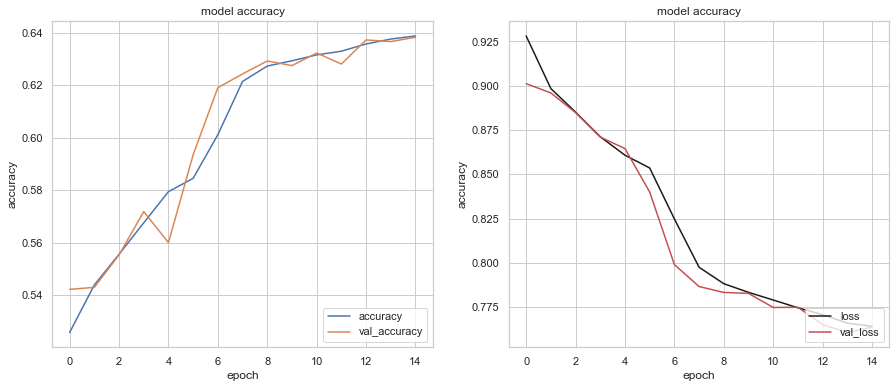

In [130]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label= 'val_accuracy')
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
# plt.show()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='loss',color='k')
plt.plot(history.history['val_loss'], label= 'val_loss',color='r')
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.show()

In [145]:
pd.DataFrame.from_dict(model_results,orient='index').sort_values(by=['f1_test','accuracy_test'],ascending=False)

accuracy_train  accuracy_test  f1_train   f1_test
LightGBMClassifier      0.85665       0.816876     0.857123  0.817206
LSTM                    0.76350       0.765213          NaN       NaN

## Task 1

Prepare a complete data analysis report on the given data.

* The exploratory analysis is performed and the insights are given above.

## Task 2

Create a predictive model in such a way that the objective is to predict the ordinal variable “damage_grade”. This column presents the level of damage grade affected by the earthquake.

* In this multiclass classification problem,

## Task 3

Suggestions to the Seismologists to avoid  earthquake event leading  to significant damage in many buildings

* 